In [1]:
# 1

########## 22 Februrary 2019 - Alec S. Hirschauer ##########
# This notebook is going to be used for fitting the color-cut
# boundary lines from the earlier notebooks from 20 Feb 2019.
#
# These will be informed by the inflection points of local
# minima as determined by KDE analysis of n = 1000 bins in
# preparation for the Dusting the Universe conference.
#
# Rather than the small magnitude spans with widths that were
# determined by the Knuth's Algorithm routine that Libby sent,
# I am mandating a thousand points per bin, since this will be
# how we address mangitude spans using the MCKDE analysis.
#
# This results in fewer points over which to fit the functions,
# but preliminary analysis shows that the lines are going to be
# just about the same.
#
# The other major difference between these boundaries and their
# subsequent stellar type lists is that we have determined the
# location of the TRGB by using MCKDE analysis written by Sundar.
#
# Our values are representative of the maximum slope of the fit
# to the distribution of points, rather than a local minimum,
# using the Savitzky-Golay filter method realized a thousand times.
#
# This gives us not only the location of the TRGB, but a solid
# basis for determining the uncertainty associated with it.
#
# Practically speaking, this moves the TRGB down the y-axis,
# which means that I expect to incorprate more sources into my
# AGB star candidate lists (or in other words, rejecting fewer).
#
# Once I get the functional fits, some of which may be piecemeal,
# I can use these to devise logic functions in CasJobs to divide
# up the master source list into the relevant stellar type lists,
# then use these to make plots which visualize the results.

In [2]:
# 2

# First thing needed is to import the relevant Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde
# This line is necessary for the number density histograms.
from astropy import stats
from astropy.stats.histogram import knuth_bin_width
# This line is necessary for determining histogram bin width.

In [3]:
# 3

# Read in my data from a .csv file saved locally.
phot_data = pd.read_csv('CMDKhanANDSibbonsHOME_ahirschauer.csv')
# This is a table of values with 30,745 rows which contains the photometric data of
# the Khan et al. (2015) catalog matched to sources from Sibbons et al. (2012)
# with an "OR" command, then downloaded from MAST CasJobs.
# print phot_data
#
# Also I'll read in the entire Sibbons+ stellar source catalog.
Sibbons_data = pd.read_csv('Sibbons2012NGC6822.csv')
# This is for a test of the histogram(s) I make later on.

In [4]:
# 4

# For the histograms, I have created new .csv files which have the specific colors'
# information: ID, RA, Dec, magnitudes, magnitude errors, color, color error.
#
# I have pre-trimmed the bogus data from these tables already, so there's no need
# to get rid of the whacky 'null' values converted to "-9999" values
# (which, when subtracted from any other value, gives another bogus value)
# like I did in the previous cell with the "full" catalog.
#
jMINUSkDATA = pd.read_csv('jMINUSk.csv')
jMINUSthreesixDATA = pd.read_csv('jMINUSthreesix.csv')
threesixMINUSeightzeroDATA = pd.read_csv('threesixMINUSeightzero.csv')
jMINUSeightzeroDATA = pd.read_csv('jMINUSeightzero.csv')
#
# After comparing cells where I made CMDs with the "filter_phot_data" data and with
# the specific colors' information above, I have found that they are the same!
# I will use these data instead of calling from the larger catalog.
#
# These two were made following a meeting with Margaret on 2 October 2018.
eightzeroMINUStwentyfourDATA = pd.read_csv('eightzeroMINUStwentyfour.csv')
fourfiveMINUSeightzeroDATA = pd.read_csv('fourfiveMINUSeightzero.csv')
#
# NB: the bin width routine Libby sent me had previously produced values that were
# clearly too big, which is probably due to "NULL" or "-9999" values in the inputs.
#
# For the individual regions in CMD_1 & CMD_2 I have made individual .csv files
# with the same information as above.
#
CMD1_region1 = pd.read_csv('CMD1_region1.csv')
CMD1_region2 = pd.read_csv('CMD1_region2.csv')
CMD1_region3 = pd.read_csv('CMD1_region3.csv')
CMD1_region4 = pd.read_csv('CMD1_region4.csv')
CMD1_region5 = pd.read_csv('CMD1_region5.csv')
#
CMD2_region1 = pd.read_csv('CMD2_region1.csv')
CMD2_region2 = pd.read_csv('CMD2_region2.csv')
CMD2_region3 = pd.read_csv('CMD2_region3.csv')
CMD2_region4 = pd.read_csv('CMD2_region4.csv')
CMD2_region5 = pd.read_csv('CMD2_region5.csv')

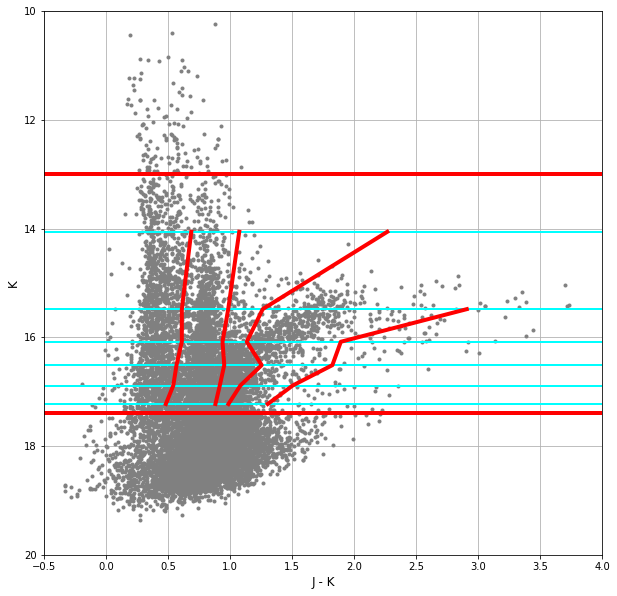

In [5]:
# 5

# K vs J-K
# CMD with color-points and lines
#
plt.figure(figsize=(10, 10))
plt.plot(jMINUSkDATA.jMINUSk, jMINUSkDATA.Kmag, '.', color='gray')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#
### where are the magnitude span bin midpoints?
#
plt.axhline(y=17.226, linewidth=2.0, color='cyan')
plt.axhline(y=16.886, linewidth=2.0, color='cyan')
plt.axhline(y=16.511, linewidth=2.0, color='cyan')
plt.axhline(y=16.081, linewidth=2.0, color='cyan')
plt.axhline(y=15.481, linewidth=2.0, color='cyan')
plt.axhline(y=14.058, linewidth=2.0, color='cyan')
#
### plot points
#
yvalues1 = np.array([17.226, 16.886, 16.511, 16.081, 15.481, 14.058])
yvalues2 = np.array([17.226, 16.886, 16.511, 16.081, 15.481, 14.058])
yvalues3 = np.array([17.226, 16.886, 16.511, 16.081, 15.481, 14.058])
yvalues4 = np.array([17.226, 16.886, 16.511, 16.081, 15.481])
boundary1 = np.array([0.483, 0.543, 0.569, 0.612, 0.612, 0.688])
boundary2 = np.array([0.883, 0.918, 0.954, 0.940, 0.986, 1.075])
boundary3 = np.array([0.988, 1.084, 1.256, 1.136, 1.264, 2.269])
boundary4 = np.array([1.305, 1.506, 1.826, 1.894, 2.910])
#
plt.plot(boundary1, yvalues1, linewidth=4.0, color='red')
plt.plot(boundary2, yvalues2, linewidth=4.0, color='red')
plt.plot(boundary3, yvalues3, linewidth=4.0, color='red')
plt.plot(boundary4, yvalues4, linewidth=4.0, color='red')
#
plt.axhline(y=17.386, linewidth=4.0, color='red') # TRGB threshold
extremely_dusty = 2.094 # from previous analysis
plt.axhline(y=13.000, linewidth=4.0, color='red') # semi-arbitrary luminosity limit
#

plt.grid(True)
plt.show()
plt.close()

In [6]:
# 6

# Using the color-cut boundaries from the plot above,
# I can use the routine POLYFIT to fit functions,
# then use these functions to make logic statements
# to make the actual catalog cuts.

from numpy.polynomial.polynomial import polyfit

yvalues1 = np.array([17.226, 16.886, 16.511, 16.081, 15.481, 14.058])
yvalues2 = np.array([17.226, 16.886, 16.511, 16.081, 15.481, 14.058])
yvalues3 = np.array([17.226, 16.886, 16.511, 16.081, 15.481, 14.058])
yvalues4 = np.array([17.226, 16.886, 16.511, 16.081, 15.481])
boundary1 = np.array([0.483, 0.543, 0.569, 0.612, 0.612, 0.688])
boundary2 = np.array([0.883, 0.918, 0.954, 0.940, 0.986, 1.075])
boundary3 = np.array([0.988, 1.084, 1.256, 1.136, 1.264, 2.269])
boundary4 = np.array([1.305, 1.506, 1.826, 1.894, 2.910])

b1, m1 = polyfit(boundary1, yvalues1, 1)
b2, m2 = polyfit(boundary2, yvalues2, 1)
b3, m3 = polyfit(boundary3, yvalues3, 1)
b4, m4 = polyfit(boundary4, yvalues4, 1)

print(m1, b1)
print(m2, b2)
print(m3, b3)
print(m4, b4)

-15.605483982931492 25.16190538802347
-16.931781725734734 32.28372260222153
-2.2417330537032787 19.02835653841086
-1.052851926844416 18.424995008267626


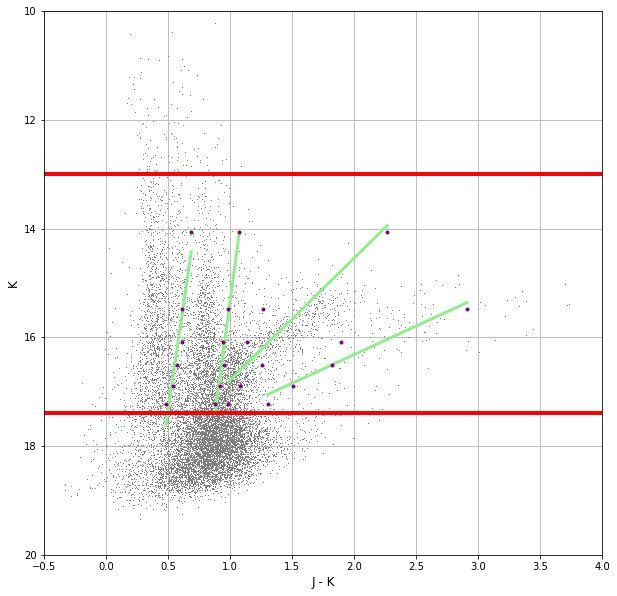

In [7]:
# 7

# Using these polynomial coefficients,
# I can now overplot the lines they represent over the
# CMD and see how they compare to the earlier lines.

plt.figure(figsize=(10, 10))
plt.plot(jMINUSkDATA.jMINUSk, jMINUSkDATA.Kmag, ',', color='gray')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)

#plt.axhline(y=17.226, linewidth=2.0, color='cyan')
#plt.axhline(y=16.886, linewidth=2.0, color='cyan')
#plt.axhline(y=16.511, linewidth=2.0, color='cyan')
#plt.axhline(y=16.081, linewidth=2.0, color='cyan')
#plt.axhline(y=15.481, linewidth=2.0, color='cyan')
#plt.axhline(y=14.058, linewidth=2.0, color='cyan')

plt.plot(boundary1, b1 + m1 * boundary1, '-', linewidth=3.0, color='lightgreen')
plt.plot(boundary2, b2 + m2 * boundary2, '-', linewidth=3.0, color='lightgreen')
plt.plot(boundary3, b3 + m3 * boundary3, '-', linewidth=3.0, color='lightgreen')
plt.plot(boundary4, b4 + m4 * boundary4, '-', linewidth=3.0, color='lightgreen')

plt.plot(boundary1, yvalues1, '.', color='purple')
plt.plot(boundary2, yvalues2, '.', color='purple')
plt.plot(boundary3, yvalues3, '.', color='purple')
plt.plot(boundary4, yvalues4, '.', color='purple')

plt.axhline(y=17.386, linewidth=4.0, color='red') # TRGB threshold
extremely_dusty = 2.094 # from previous analysis
plt.axhline(y=13.000, linewidth=4.0, color='red') # semi-arbitrary luminosity limit
#
plt.grid(True)
plt.show()
plt.close()

In [8]:
# 8

# Clearly, these could use some improvement.
#
# I'm going to break these down into pieces
# and see if that helps (at least boundaries 1 & 3).

yvalues1a = np.array([17.226, 16.886, 16.511, 16.081])
yvalues1b = np.array([16.081, 15.481, 14.058])

yvalues2 = np.array([17.226, 16.886, 16.511, 16.081, 15.481, 14.058])

yvalues3a = np.array([17.226, 16.886, 16.511])
yvalues3b = np.array([16.511, 16.081])
yvalues3c = np.array([16.081, 15.481, 14.058])

yvalues4 = np.array([17.226, 16.886, 16.511, 16.081, 15.481])

#

boundary1a = np.array([0.483, 0.543, 0.569, 0.612])
boundary1b = np.array([0.612, 0.612, 0.688])

boundary2 = np.array([0.883, 0.918, 0.954, 0.940, 0.986, 1.075])

boundary3a = np.array([0.988, 1.084, 1.256])
boundary3b = np.array([1.256, 1.136])
boundary3c = np.array([1.136, 1.264, 2.269])

boundary4 = np.array([1.305, 1.506, 1.826, 1.894, 2.910])

#

b1a, m1a = polyfit(boundary1a, yvalues1a, 1)
b1b, m1b = polyfit(boundary1b, yvalues1b, 1)

b2, m2 = polyfit(boundary2, yvalues2, 1)

b3a, m3a = polyfit(boundary3a, yvalues3a, 1)
b3b, m3b = polyfit(boundary3b, yvalues3b, 1)
b3c, m3c = polyfit(boundary3c, yvalues3c, 1)

b4, m4 = polyfit(boundary4, yvalues4, 1)

#

print(m1a, b1a)
print(m1b, b1b)

print(m2, b2)

print(m3a, b3a)
print(m3b, b3b)
print(m3c, b3c)

print(m4, b4)

-8.973455888669315 21.627104286573292
-22.671052631579006 29.655684210526356
-16.931781725734734 32.28372260222153
-2.6102834827885673 19.770007810240113
3.583333333333326 12.01033333333334
-1.6445077221832178 17.766068851624482
-1.052851926844416 18.424995008267626


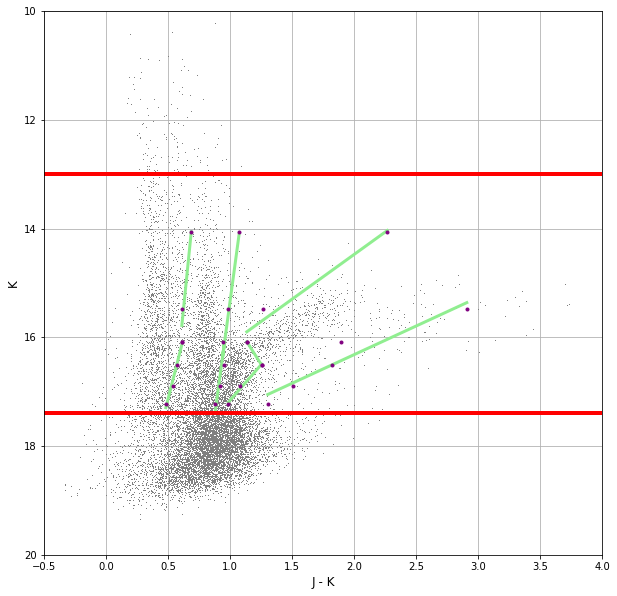

In [9]:
# 9

# And using the new polynomial coefficients above,
# let's overplot the resultant lines again on the CMD.

plt.figure(figsize=(10, 10))
plt.plot(jMINUSkDATA.jMINUSk, jMINUSkDATA.Kmag, ',', color='gray')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)

#plt.axhline(y=17.226, linewidth=2.0, color='cyan')
#plt.axhline(y=16.886, linewidth=2.0, color='cyan')
#plt.axhline(y=16.511, linewidth=2.0, color='cyan')
#plt.axhline(y=16.081, linewidth=2.0, color='cyan')
#plt.axhline(y=15.481, linewidth=2.0, color='cyan')
#plt.axhline(y=14.058, linewidth=2.0, color='cyan')

plt.plot(boundary1a, b1a + m1a * boundary1a, '-', linewidth=3.0, color='lightgreen')
plt.plot(boundary1b, b1b + m1b * boundary1b, '-', linewidth=3.0, color='lightgreen')

plt.plot(boundary2, b2 + m2 * boundary2, '-', linewidth=3.0, color='lightgreen')

plt.plot(boundary3a, b3a + m3a * boundary3a, '-', linewidth=3.0, color='lightgreen')
plt.plot(boundary3b, b3b + m3b * boundary3b, '-', linewidth=3.0, color='lightgreen')
plt.plot(boundary3c, b3c + m3c * boundary3c, '-', linewidth=3.0, color='lightgreen')

plt.plot(boundary4, b4 + m4 * boundary4, '-', linewidth=3.0, color='lightgreen')

#

plt.plot(boundary1a, yvalues1a, '.', color='purple')
plt.plot(boundary1b, yvalues1b, '.', color='purple')

plt.plot(boundary2, yvalues2, '.', color='purple')

plt.plot(boundary3a, yvalues3a, '.', color='purple')
plt.plot(boundary3b, yvalues3b, '.', color='purple')
plt.plot(boundary3c, yvalues3c, '.', color='purple')

plt.plot(boundary4, yvalues4, '.', color='purple')

#

plt.axhline(y=17.386, linewidth=4.0, color='red') # TRGB threshold
extremely_dusty = 2.094 # from previous analysis
plt.axhline(y=13.000, linewidth=4.0, color='red') # semi-arbitrary luminosity limit
#
plt.grid(True)
plt.show()
plt.close()

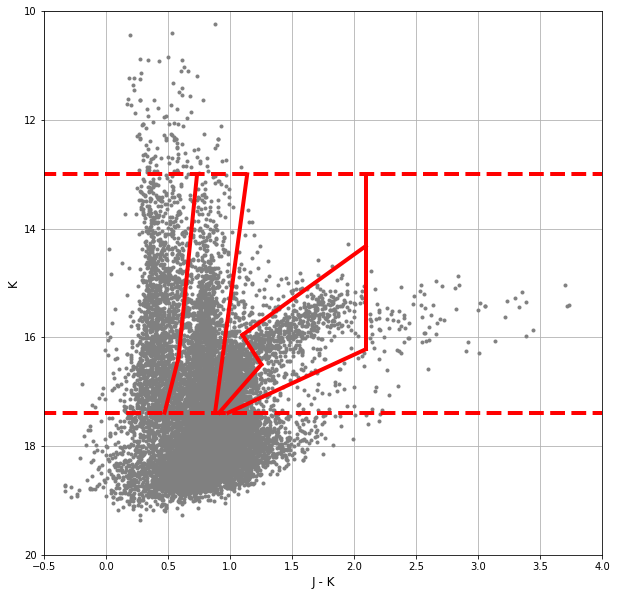

In [10]:
# 10

# Okay, those look better.
#
# Once I define the ranges over which the functions should be plot,
# they'll be more continuous and then I can define the regions
# with logic functions in order to make the new stellar type lists.

plt.figure(figsize=(10, 10))
plt.plot(jMINUSkDATA.jMINUSk, jMINUSkDATA.Kmag, '.', color='gray')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)

# TRGB limit
#
x_TRGB = np.linspace(-1.0, 5.0, 100)
y_TRGB = 0.0*x_TRGB + 17.386

# brightness limit
#
x_bright = np.linspace(-1.0, 5.0, 100)
y_bright = 0.0*x_bright + 13.0

# dusty limit
#
extremely_dusty = 2.094 # from previous analysis

# Boundary 1
#
x_Boundary1a = np.linspace(0.472628, 0.58613055, 100)
y_Boundary1a = -8.973455888669315*x_Boundary1a + 21.627104286573292

x_Boundary1b = np.linspace(0.58613055, 0.734667, 100)
y_Boundary1b = -22.671052631579006*x_Boundary1b + 29.655684210526356

# Boundary 2
#
x_Boundary2 = np.linspace(1.13891, 0.879867, 100)
y_Boundary2 = -16.931781725734734*x_Boundary2 + 32.28372260222153

# Boundary 3
#
x_Boundary3a = np.linspace(0.913314, 1.252850266214154, 100)
y_Boundary3a = -2.6102834827885673*x_Boundary3a + 19.770007810240113

x_Boundary3b = np.linspace(1.100977527275347, 1.252850266214154, 100)
y_Boundary3b = 3.583333333333326*x_Boundary3b + 12.01033333333334

x_Boundary3c = np.linspace(1.100977527275347, 2.094, 100) # old right: 2.89817
y_Boundary3c = -1.6445077221832178*x_Boundary3c + 17.766068851624482

# Boundary 4
#
x_Boundary4 = np.linspace(0.986839, 2.094, 100)
y_Boundary4 = -1.052851926844416*x_Boundary4 + 18.424995008267626

# plot lines
#
plt.plot(x_TRGB, y_TRGB, '--', linewidth=4.0, color='red')
plt.plot(x_bright, y_bright, '--', linewidth=4.0, color='red')

plt.plot(x_Boundary1a, y_Boundary1a, linewidth=4.0, color='red')
plt.plot(x_Boundary1b, y_Boundary1b, linewidth=4.0, color='red')

plt.plot(x_Boundary2, y_Boundary2, linewidth=4.0, color='red')

plt.plot(x_Boundary3a, y_Boundary3a, linewidth=4.0, color='red')
plt.plot(x_Boundary3b, y_Boundary3b, linewidth=4.0, color='red')
plt.plot(x_Boundary3c, y_Boundary3c, linewidth=4.0, color='red')

plt.plot(x_Boundary4, y_Boundary4, linewidth=4.0, color='red')

#plt.vlines(x=extremely_dusty, ymin=16.2203, ymax=13.0, linewidth=4.0, color='red')
y_extremely_dusty = np.linspace(16.2203, 13.0, 100)
x_extremely_dusty = 0.0*y_extremely_dusty + extremely_dusty
plt.plot(x_extremely_dusty, y_extremely_dusty, linewidth=4.0, color='red')

plt.grid(True)
plt.show()
plt.close()
#plt.savefig('CMD1_boundaries.png')

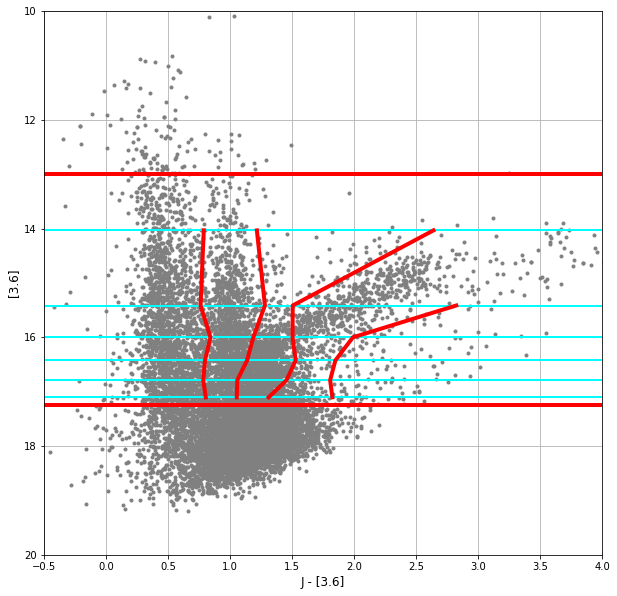

In [11]:
# 11

# [3.6] vs J-[3.6]
# CMD with color-points and lines
#
plt.figure(figsize=(10, 10))
plt.plot(jMINUSthreesixDATA.jMINUSthreesix, jMINUSthreesixDATA.k36mag, '.', color='gray')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
### where are the magnitude span bin midpoints?
#
plt.axhline(y=17.103, linewidth=2.0, color='cyan')
plt.axhline(y=16.789, linewidth=2.0, color='cyan')
plt.axhline(y=16.424, linewidth=2.0, color='cyan')
plt.axhline(y=15.999, linewidth=2.0, color='cyan')
plt.axhline(y=15.414, linewidth=2.0, color='cyan')
plt.axhline(y=14.032, linewidth=2.0, color='cyan')
#
### plot points
#
yvalues1 = np.array([17.103, 16.789, 16.424, 15.999, 15.414, 14.032])
yvalues2 = np.array([17.103, 16.789, 16.424, 15.999, 15.414, 14.032])
yvalues3 = np.array([17.103, 16.789, 16.424, 15.999, 15.414, 14.032])
yvalues4 = np.array([17.103, 16.789, 16.424, 15.999, 15.414])
boundary1 = np.array([0.805, 0.785, 0.799, 0.843, 0.763, 0.789])
boundary2 = np.array([1.055, 1.059, 1.138, 1.1885, 1.282, 1.217])
boundary3 = np.array([1.312, 1.456, 1.530, 1.505, 1.506, 2.641])
boundary4 = np.array([1.826, 1.808, 1.850, 1.992, 2.825])
#
plt.plot(boundary1, yvalues1, linewidth=4.0, color='red')
plt.plot(boundary2, yvalues2, linewidth=4.0, color='red')
plt.plot(boundary3, yvalues3, linewidth=4.0, color='red')
plt.plot(boundary4, yvalues4, linewidth=4.0, color='red')
#
plt.axhline(y=17.243, linewidth=4.0, color='red') # TRGB threshold
extremely_dusty = 2.637 # from previous analysis
plt.axhline(y=13.000, linewidth=4.0, color='red') # semi-arbitrary luminosity limit
#

plt.grid(True)
plt.show()
plt.close()

In [12]:
# 12

# Using the color-cut boundaries from the plot above,
# I can use the routine POLYFIT to fit functions,
# then use these functions to make logic statements
# to make the actual catalog cuts.

from numpy.polynomial.polynomial import polyfit

yvalues1 = np.array([17.103, 16.789, 16.424, 15.999, 15.414, 14.032])
yvalues2 = np.array([17.103, 16.789, 16.424, 15.999, 15.414, 14.032])
yvalues3 = np.array([17.103, 16.789, 16.424, 15.999, 15.414, 14.032])
yvalues4 = np.array([17.103, 16.789, 16.424, 15.999, 15.414])
boundary1 = np.array([0.805, 0.785, 0.799, 0.843, 0.763, 0.789])
boundary2 = np.array([1.055, 1.059, 1.138, 1.1885, 1.282, 1.217])
boundary3 = np.array([1.312, 1.456, 1.530, 1.505, 1.506, 2.641])
boundary4 = np.array([1.826, 1.808, 1.850, 1.992, 2.825])

b1, m1 = polyfit(boundary1, yvalues1, 1)
b2, m2 = polyfit(boundary2, yvalues2, 1)
b3, m3 = polyfit(boundary3, yvalues3, 1)
b4, m4 = polyfit(boundary4, yvalues4, 1)

print(m1, b1)
print(m2, b2)
print(m3, b3)
print(m4, b4)

10.121875587295742 7.889657865062863
-9.59327546468594 27.055589181198016
-2.0513712639208146 19.36202401266869
-1.3221565607847192 19.069706946528676


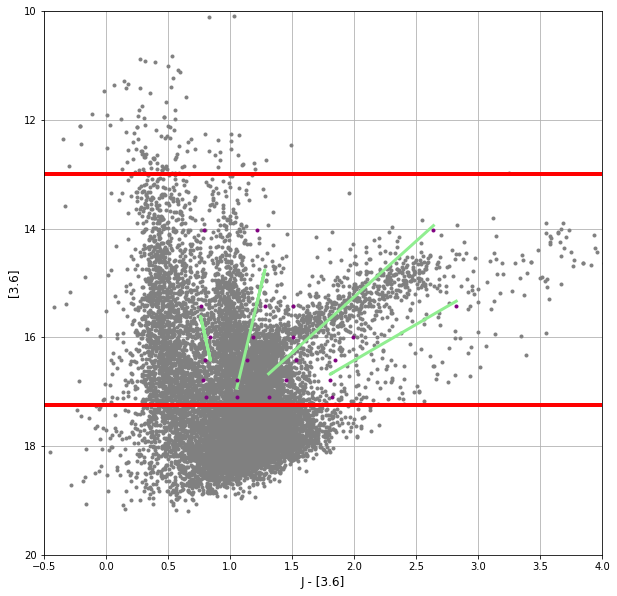

In [13]:
# 13

# Using these polynomial coefficients,
# I can now overplot the lines they represent over the
# CMD and see how they compare to the earlier lines.

plt.figure(figsize=(10, 10))
plt.plot(jMINUSthreesixDATA.jMINUSthreesix, jMINUSthreesixDATA.k36mag, '.', color='gray')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)

#plt.axhline(y=17.103, linewidth=2.0, color='cyan')
#plt.axhline(y=16.789, linewidth=2.0, color='cyan')
#plt.axhline(y=16.424, linewidth=2.0, color='cyan')
#plt.axhline(y=15.999, linewidth=2.0, color='cyan')
#plt.axhline(y=15.414, linewidth=2.0, color='cyan')
#plt.axhline(y=14.032, linewidth=2.0, color='cyan')

plt.plot(boundary1, b1 + m1 * boundary1, '-', linewidth=3.0, color='lightgreen')
plt.plot(boundary2, b2 + m2 * boundary2, '-', linewidth=3.0, color='lightgreen')
plt.plot(boundary3, b3 + m3 * boundary3, '-', linewidth=3.0, color='lightgreen')
plt.plot(boundary4, b4 + m4 * boundary4, '-', linewidth=3.0, color='lightgreen')

plt.plot(boundary1, yvalues1, '.', color='purple')
plt.plot(boundary2, yvalues2, '.', color='purple')
plt.plot(boundary3, yvalues3, '.', color='purple')
plt.plot(boundary4, yvalues4, '.', color='purple')

plt.axhline(y=17.243, linewidth=4.0, color='red') # TRGB threshold
extremely_dusty = 2.637 # from previous analysis
plt.axhline(y=13.000, linewidth=4.0, color='red') # semi-arbitrary luminosity limit
#
plt.grid(True)
plt.show()
plt.close()

In [14]:
# 14

# Clearly, these could use some improvement.
#
# I'm going to break these down into pieces
# and see if that helps.

yvalues1 = np.array([17.103, 16.789, 16.424, 15.999, 15.414, 14.032])

yvalues2 = np.array([17.103, 16.789, 16.424, 15.999, 15.414])

yvalues3a = np.array([17.103, 16.789, 16.424])
yvalues3b = np.array([16.424, 15.999, 15.414])
yvalues3c = np.array([15.414, 14.032])

yvalues4a = np.array([17.103, 16.789, 16.424])
yvalues4b = np.array([16.424, 15.999, 15.414])

#

boundary1 = np.array([0.805, 0.785, 0.799, 0.843, 0.763, 0.789]) # all mean: 0.7973

boundary2 = np.array([1.055, 1.059, 1.138, 1.1885, 1.282]) # last two mean: 1.2495

boundary3a = np.array([1.312, 1.456, 1.530])
boundary3b = np.array([1.530, 1.505, 1.506])
boundary3c = np.array([1.506, 2.641])

boundary4a = np.array([1.826, 1.808, 1.850])
boundary4b = np.array([1.850, 1.992, 2.825])

#

b1, m1 = polyfit(boundary1, yvalues1, 1)

b2, m2 = polyfit(boundary2, yvalues2, 1)

b3a, m3a = polyfit(boundary3a, yvalues3a, 1)
b3b, m3b = polyfit(boundary3b, yvalues3b, 1)
b3c, m3c = polyfit(boundary3c, yvalues3c, 1)

b4a, m4a = polyfit(boundary4a, yvalues4a, 1)
b4b, m4b = polyfit(boundary4b, yvalues4b, 1)

#

print(m1, b1)

print(m2, b2)

print(m3a, b3a)
print(m3b, b3b)
print(m3c, b3c)

print(m4a, b4a)
print(m4b, b4b)

10.121875587295742 7.889657865062863
-6.892777240712633 24.234583551995616
-2.9869805793642614 21.05134751003588
28.51913477537429 -27.222797004991552
-1.2176211453744457 17.247737444933914
-9.749999999999865 34.59499999999975
-0.920541389986539 17.991416482346754


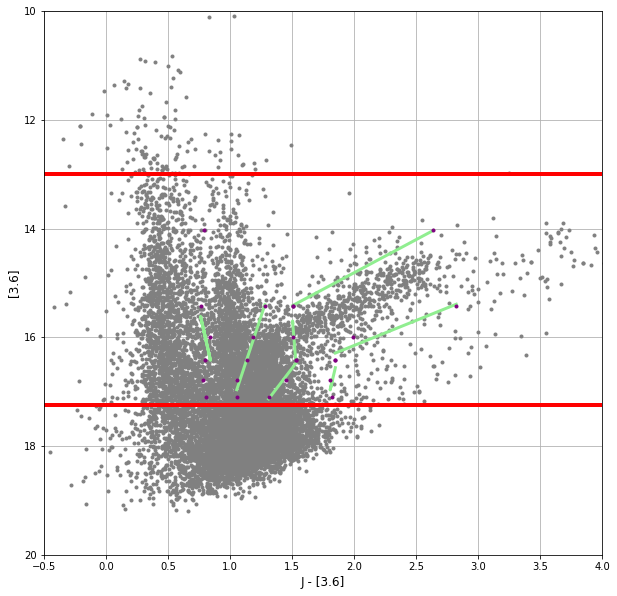

In [15]:
# 15

# And using the new polynomial coefficients above,
# let's overplot the resultant lines again on the CMD.

plt.figure(figsize=(10, 10))
plt.plot(jMINUSthreesixDATA.jMINUSthreesix, jMINUSthreesixDATA.k36mag, '.', color='gray')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)

#plt.axhline(y=17.103, linewidth=2.0, color='cyan')
#plt.axhline(y=16.789, linewidth=2.0, color='cyan')
#plt.axhline(y=16.424, linewidth=2.0, color='cyan')
#plt.axhline(y=15.999, linewidth=2.0, color='cyan')
#plt.axhline(y=15.414, linewidth=2.0, color='cyan')
#plt.axhline(y=14.032, linewidth=2.0, color='cyan')

plt.plot(boundary1, b1 + m1 * boundary1, '-', linewidth=3.0, color='lightgreen')

plt.plot(boundary2, b2 + m2 * boundary2, '-', linewidth=3.0, color='lightgreen')

plt.plot(boundary3a, b3a + m3a * boundary3a, '-', linewidth=3.0, color='lightgreen')
plt.plot(boundary3b, b3b + m3b * boundary3b, '-', linewidth=3.0, color='lightgreen')
plt.plot(boundary3c, b3c + m3c * boundary3c, '-', linewidth=3.0, color='lightgreen')

plt.plot(boundary4a, b4a + m4a * boundary4a, '-', linewidth=3.0, color='lightgreen')
plt.plot(boundary4b, b4b + m4b * boundary4b, '-', linewidth=3.0, color='lightgreen')

#

plt.plot(boundary1, yvalues1, '.', color='purple')

plt.plot(boundary2, yvalues2, '.', color='purple')

plt.plot(boundary3a, yvalues3a, '.', color='purple')
plt.plot(boundary3b, yvalues3b, '.', color='purple')
plt.plot(boundary3c, yvalues3c, '.', color='purple')

plt.plot(boundary4a, yvalues4a, '.', color='purple')
plt.plot(boundary4b, yvalues4b, '.', color='purple')

#

plt.axhline(y=17.243, linewidth=4.0, color='red') # TRGB threshold
extremely_dusty = 2.637 # from previous analysis
plt.axhline(y=13.000, linewidth=4.0, color='red') # semi-arbitrary luminosity limit
#
plt.grid(True)
plt.show()
plt.close()

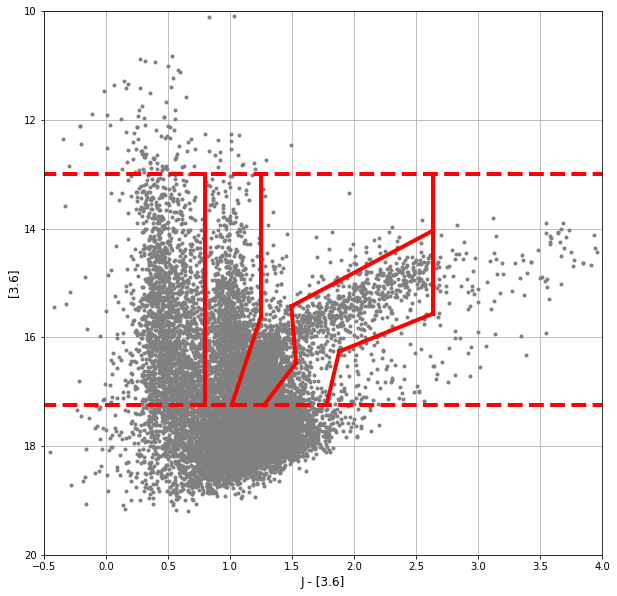

In [16]:
# 16

# Okay, those look better.
#
# Once I define the ranges over which the functions should be plot,
# they'll be more continuous and then I can define the regions
# with logic functions in order to make the new stellar type lists.

plt.figure(figsize=(10, 10))
plt.plot(jMINUSthreesixDATA.jMINUSthreesix, jMINUSthreesixDATA.k36mag, '.', color='gray')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)

Boundary1_vert = 0.7973
Boundary2_vert = 1.2495

# TRGB limit
#
x_TRGB = np.linspace(-1.0, 5.0, 100)
y_TRGB = 0.0*x_TRGB + 17.243

# brightness limit
#
x_bright = np.linspace(-1.0, 5.0, 100)
y_bright = 0.0*x_bright + 13.0

# dusty limit
#
extremely_dusty = 2.637 # from previous analysis

# Boundary 1
#
### only a vertical line, not a function!

# Boundary 2
#
x_Boundary2 = np.linspace(1.01433, 1.24949, 100)
y_Boundary2 = -6.892777240712633*x_Boundary2 + 24.234583551995616

# Boundary 3
#
x_Boundary3a = np.linspace(1.27498, 1.532215062742318, 100)
y_Boundary3a = -2.9869805793642614*x_Boundary3a + 21.05134751003588

x_Boundary3b = np.linspace(1.532215062742318, 1.495473634327956, 100)
y_Boundary3b = 28.51913477537429*x_Boundary3b + -27.222797004991552

x_Boundary3c = np.linspace(1.495473634327956, 2.637, 100)
y_Boundary3c = -1.2176211453744457*x_Boundary3c + 17.247737444933914

# Boundary 4
#
x_Boundary4a = np.linspace(1.77969, 1.88047583108020, 100)
y_Boundary4a = -9.749999999999865*x_Boundary4a + 34.59499999999975

x_Boundary4b = np.linspace(1.88047583108020, 2.63705, 100)
y_Boundary4b = -0.920541389986539*x_Boundary4b + 17.991416482346754

# plot lines
#
plt.plot(x_TRGB, y_TRGB, '--', linewidth=4.0, color='red')
plt.plot(x_bright, y_bright, '--', linewidth=4.0, color='red')

plt.plot(x_Boundary2, y_Boundary2, linewidth=4.0, color='red')

plt.plot(x_Boundary3a, y_Boundary3a, linewidth=4.0, color='red')
plt.plot(x_Boundary3b, y_Boundary3b, linewidth=4.0, color='red')
plt.plot(x_Boundary3c, y_Boundary3c, linewidth=4.0, color='red')

plt.plot(x_Boundary4a, y_Boundary4a, linewidth=4.0, color='red')
plt.plot(x_Boundary4b, y_Boundary4b, linewidth=4.0, color='red')

#plt.vlines(x=Boundary1_vert, ymin=17.243, ymax=13.0, linewidth=4.0, color='red')
y_Boundary1 = np.linspace(13.0, 17.243, 100)
x_Boundary1 = 0.0*y_Boundary1 + Boundary1_vert
plt.plot(x_Boundary1, y_Boundary1, linewidth=4.0, color='red')

#plt.vlines(x=Boundary2_vert, ymin=17.243, ymax=13.0, linewidth=4.0, color='red')
y_Boundary2 = np.linspace(13.0, 15.6221, 100)
x_Boundary2 = 0.0*y_Boundary2 + Boundary2_vert
plt.plot(x_Boundary2, y_Boundary2, linewidth=4.0, color='red')

y_extremely_dusty = np.linspace(15.5639, 13.0, 100)
x_extremely_dusty = 0.0*y_extremely_dusty + extremely_dusty
plt.plot(x_extremely_dusty, y_extremely_dusty, linewidth=4.0, color='red')

plt.grid(True)
plt.show()
plt.close()
#plt.savefig('CMD2_boundaries.png')

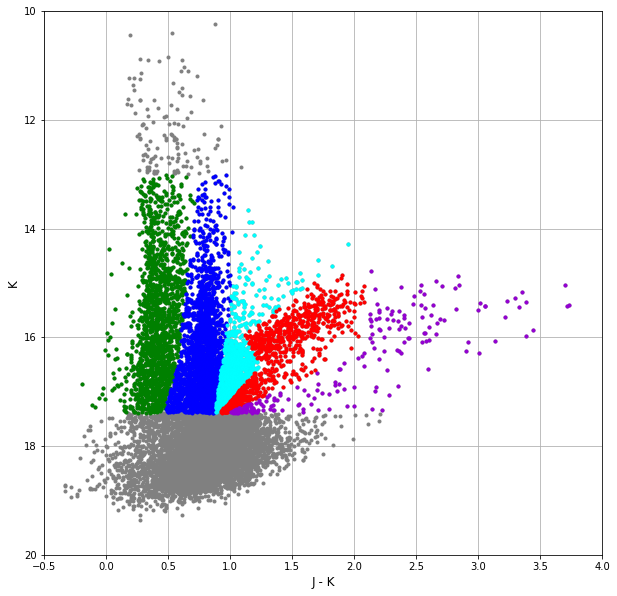

In [17]:
# 17

# With the color-cut boundaries in place on the CMDs, now I can
# overplot the segregated objects lists which I had originally
# done using the program GlueViz.

# CMD_1 (K vs J-K)

plt.figure(figsize=(10, 10))
plt.plot(jMINUSkDATA.jMINUSk, jMINUSkDATA.Kmag, '.', color='gray')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)

plt.plot(CMD1_region1.jMINUSk, CMD1_region1.Kmag, '.', color='green')
plt.plot(CMD1_region2.jMINUSk, CMD1_region2.Kmag, '.', color='blue')
plt.plot(CMD1_region3.jMINUSk, CMD1_region3.Kmag, '.', color='cyan')
plt.plot(CMD1_region4.jMINUSk, CMD1_region4.Kmag, '.', color='red')
plt.plot(CMD1_region5.jMINUSk, CMD1_region5.Kmag, '.', color='darkviolet')

plt.grid(True)
plt.show()
plt.close()
#plt.savefig('CMD1_populations.pdf')

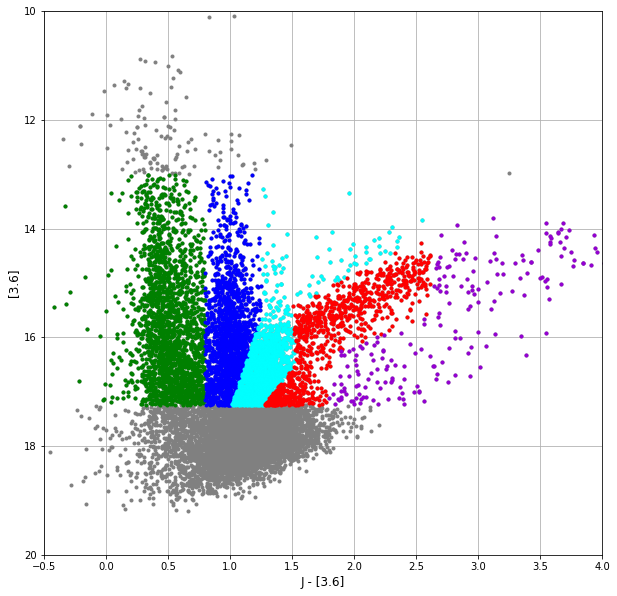

In [18]:
# 18

# With the color-cut boundaries in place on the CMDs, now I can
# overplot the segregated objects lists which I had originally
# done using the program GlueViz.

# CMD_2 ([3.6] vs J-[3.6])

plt.figure(figsize=(10, 10))
plt.plot(jMINUSthreesixDATA.jMINUSthreesix, jMINUSthreesixDATA.k36mag, '.', color='gray')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)

plt.plot(CMD2_region1.jMINUSthreesix, CMD2_region1.k36mag, '.', color='green')
plt.plot(CMD2_region2.jMINUSthreesix, CMD2_region2.k36mag, '.', color='blue')
plt.plot(CMD2_region3.jMINUSthreesix, CMD2_region3.k36mag, '.', color='cyan')
plt.plot(CMD2_region4.jMINUSthreesix, CMD2_region4.k36mag, '.', color='red')
plt.plot(CMD2_region5.jMINUSthreesix, CMD2_region5.k36mag, '.', color='darkviolet')

plt.grid(True)
plt.show()
plt.close()
#plt.savefig('CMD2_populations.pdf')

In [19]:
# 19

# I have successfully isolated five diferent stellar types
# for both CMD1 and CMD2.
#
# These are:
# [1] foreground and main sequence stars (green)
# [2] O-rich AGB stars (blue)
# [3] first dusty track of O-rich AGB stars (cyan)
# [4] C-rich AGB stars (red)
# [5] dust-enshrouded and YSOs (darkviolet)
#
# For the presentation, I'll make final versions of these plots
# with the color-cut boundaries included.
#
# The numbers for each type in CMD are as follows...

print(len(CMD1_region1))
print(len(CMD1_region2))
print(len(CMD1_region3))
print(len(CMD1_region4))
print(len(CMD1_region5))

print(len(CMD2_region1))
print(len(CMD2_region2))
print(len(CMD2_region3))
print(len(CMD2_region4))
print(len(CMD2_region5))

1625
2141
1000
865
217
2019
1559
1640
925
228
